# Indicadores Financeiros Educacionais
## Percentual do investimento direto em relação ao Produto Interno Bruto (PIB), por nível de ensino – 2000 a 2021


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Limpando e renomeando

In [ ]:
df = pd.read_excel('../data/original/Investimento_pib_direto.xlsx', skiprows=5) 


df.columns = [
    "ano",
    "todos_niveis",
    "educacao_basica",
    "infantil",
    "fundamental_iniciais",
    "fundamental_finais",
    "ensino_medio",
    "superior"
]
df.describe()

## Tratando os valores ausentes

In [18]:
# Verificar valores ausentes
print(df.isnull().sum())

# Remover linhas onde o ano está ausente (são inválidas)
df = df[df["ano"].notna()]

# Converter colunas numéricas
for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Substituir valores ausentes restantes por 0 ou usar interpolação, por exemplo:
df.fillna(0, inplace=True)  # ou df.interpolate()


ano                     0
todos_niveis            2
educacao_basica         2
infantil                2
fundamental_iniciais    2
fundamental_finais      2
ensino_medio            2
superior                2
dtype: int64


In [19]:
df.head()

,ano,todos_niveis,educacao_basica,infantil,fundamental_iniciais,fundamental_finais,ensino_medio,superior
1,2000,3.883998,3.167960,0.334429,1.294598,1.033962,0.504971,0.716039
2,2001,4.006565,3.269947,0.319622,1.242529,1.113917,0.593879,0.736619
3,2002,4.057124,3.283153,0.307751,1.439820,1.107425,0.428157,0.773971
4,2003,3.822982,3.130648,0.345737,1.289013,1.019326,0.476573,0.692333
5,2004,3.826737,3.188244,0.350975,1.341727,1.066824,0.428718,0.638493


In [20]:
df.to_csv("../data/tratado/investimento_tratado.csv", index=False)


## Análise exploratória

In [22]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 1 to 25
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ano                   24 non-null     object 
 1   todos_niveis          24 non-null     float64
 2   educacao_basica       24 non-null     float64
 3   infantil              24 non-null     float64
 4   fundamental_iniciais  24 non-null     float64
 5   fundamental_finais    24 non-null     float64
 6   ensino_medio          24 non-null     float64
 7   superior              24 non-null     float64
dtypes: float64(7), object(1)
memory usage: 1.7+ KB


,todos_niveis,educacao_basica,infantil,fundamental_iniciais,fundamental_finais,ensino_medio,superior
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,4.232005,3.508137,0.434669,1.274579,1.119165,0.679954,0.723439
std,1.389969,1.156186,0.199582,0.405867,0.373187,0.293412,0.247708
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.975923,3.249521,0.332357,1.293202,1.079041,0.497872,0.681461
50%,4.744068,3.932825,0.368477,1.385251,1.156055,0.686563,0.757735
75%,5.007987,4.164023,0.589422,1.444879,1.330062,0.930369,0.837129
max,5.177914,4.282400,0.796471,1.584078,1.507638,1.019313,1.026969


In [ ]:
df["ano"] = pd.to_numeric(df["ano"], errors="coerce")
df = df[df["ano"].notna()]  
df["ano"] = df["ano"].astype(int)

df["decada"] = (df["ano"] // 10) * 10


C:\Users\rrs4_cesar\AppData\Local\Temp\ipykernel_19492\1996471350.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["ano"] = df["ano"].astype(int)
C:\Users\rrs4_cesar\AppData\Local\Temp\ipykernel_19492\1996471350.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["decada"] = (df["ano"] // 10) * 10


In [30]:
df["decada"] = (df["ano"] // 10) * 10

media_decada = df.groupby("decada")["todos_niveis"].mean().reset_index()

media_decada


C:\Users\rrs4_cesar\AppData\Local\Temp\ipykernel_19492\3141190525.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["decada"] = (df["ano"] // 10) * 10


,decada,todos_niveis
0,2000,4.146842
1,2010,5.054308
2,2020,4.778314


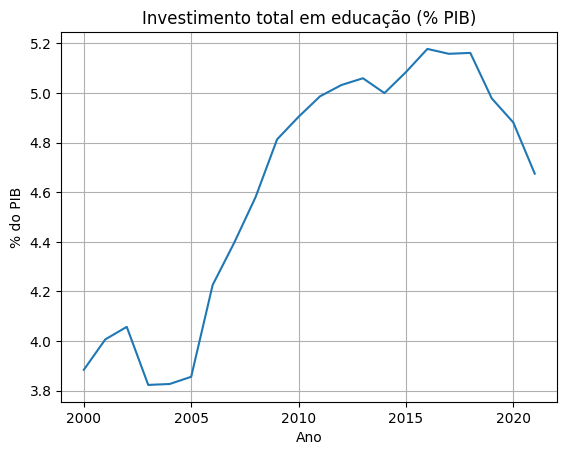

In [31]:
plt.plot(df["ano"], df["todos_niveis"])
plt.title("Investimento total em educação (% PIB)")
plt.xlabel("Ano")
plt.ylabel("% do PIB")
plt.grid(True)
plt.show()


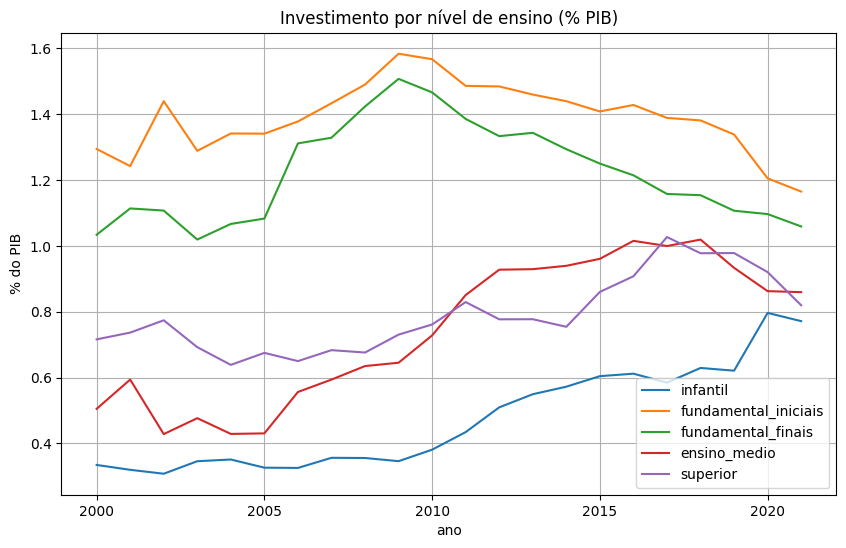

In [32]:
df.set_index("ano")[["infantil", "fundamental_iniciais", "fundamental_finais", "ensino_medio", "superior"]].plot(figsize=(10,6))
plt.title("Investimento por nível de ensino (% PIB)")
plt.ylabel("% do PIB")
plt.grid(True)
plt.show()


## Gerando o documento tratado para o PWBI :)

In [33]:
df.to_csv("../data/tratado/investimento_tratado.csv", index=False)